<a id=1></a>
**<h1>Explanation of Features</h1>**
* **Country** : Name of the country.
* **Region** : Region the country belongs to.
* **Happiness Rank** : Rank of the country based on the Happiness Score.
* **Happiness Score** : A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* **Economy** : real GDP per capita
* **Family** : social support
* **Health**  healthy life expectancy
* **Freedom** : freedom to make life choices
* **Trust** : perceptions of corruption
* **Generosity** : perceptions of generosity
* **Dystopia** : each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc = {"figure.figsize":(6,6)})

In [29]:
#load data from csv file
data_2015=pd.read_csv('../input/2015.csv')
data_2016=pd.read_csv('../input/2016.csv')
data_2017=pd.read_csv('../input/2017.csv')
#columns name change
data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]



In [30]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [31]:
#getting an overview of our data
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country              158 non-null object
Region               158 non-null object
Happiness_Rank       158 non-null int64
Happiness_Score      158 non-null float64
Standard_Error       158 non-null float64
Economy              158 non-null float64
Family               158 non-null float64
Health               158 non-null float64
Freedom              158 non-null float64
Trust                158 non-null float64
Generosity           158 non-null float64
Dystopia_Residual    158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


* We look at the type of happiness score and do not need to change the type because it is a float type. 
* Also there is no missing data in our data. Let's check if there is missing data

In [32]:
print("Are There Missing Data? :",data_2015.isnull().any().any())
print(data_2015.isnull().sum())

Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


There is no missing data in our dataset, but it can be meaningless data. Let's see if there's meaningless data for happiness score.
* We have not seen meaningless data for happiness score. It is good thing for us.

In [34]:
#we found out how many hospital country in our data
print("\n\nRegion in Dataset:\n")
print("There are {} different values\n".format(len(data_2015.Region.unique())))
print(data_2015.Region.unique())



Region in Dataset:

There are 10 different values

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


* We found unique region names in our dataset and we calculated the happiness rate according to the regions and created a dataframe in descending order.

In [35]:
region_lists=list(data_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


<a id=2></a>
**<h1>Bar Plot</h1>**
What are the happiest regions of the world in 2015?
* We have interpreted the answer of the question by visualizing it.

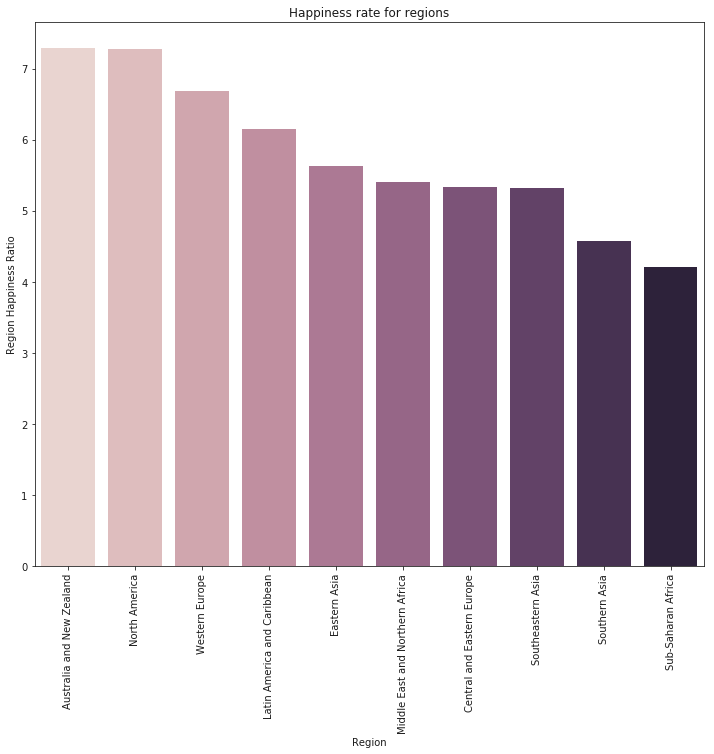

In [36]:
#Visualization
#Create a new figure and make the size (12,10)
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

According to the region, what is the effect of the economy on the happiness score?
* I have interpreted the question

In [37]:
region_lists=list(data_2015['Region'].unique())
region_economy_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)
    
data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=True)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head()

,region,region_economy_ratio
8,Sub-Saharan Africa,0.380473
9,Southern Asia,0.560486
5,Southeastern Asia,0.789054
4,Latin America and Caribbean,0.876815
6,Central and Eastern Europe,0.942438


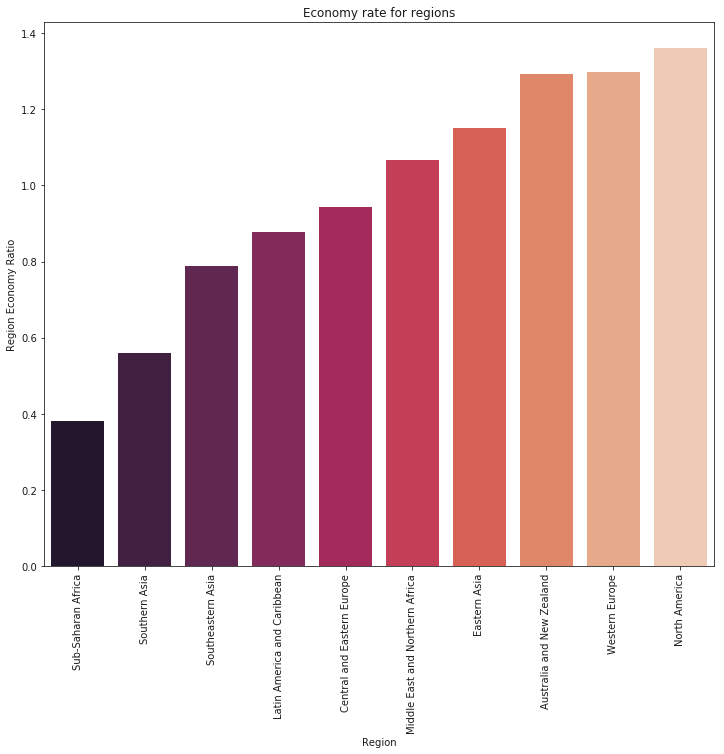

In [38]:
#Visualization
#Create a new figure and make the size (12,10)
f,ax1 = plt.subplots(figsize =(12,10))
sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'],palette="rocket", ax=ax1)
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

* What is the ratio of the factors affecting the Happiness Score according to the regions?

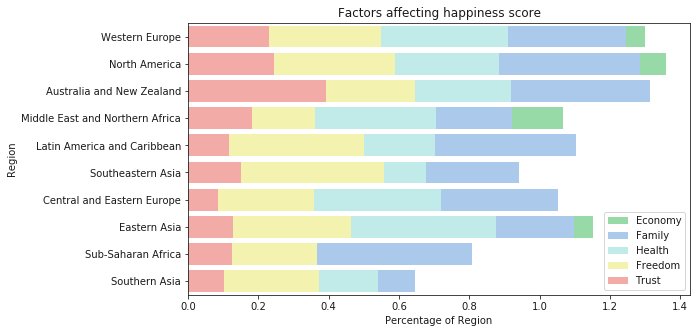

In [39]:
#Horizontal bar plot
region_lists=list(data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

<a id=2></a>
**<h1>Point Plot</h1>**
* The rate of happiness score and the rate of economy affecting happiness score

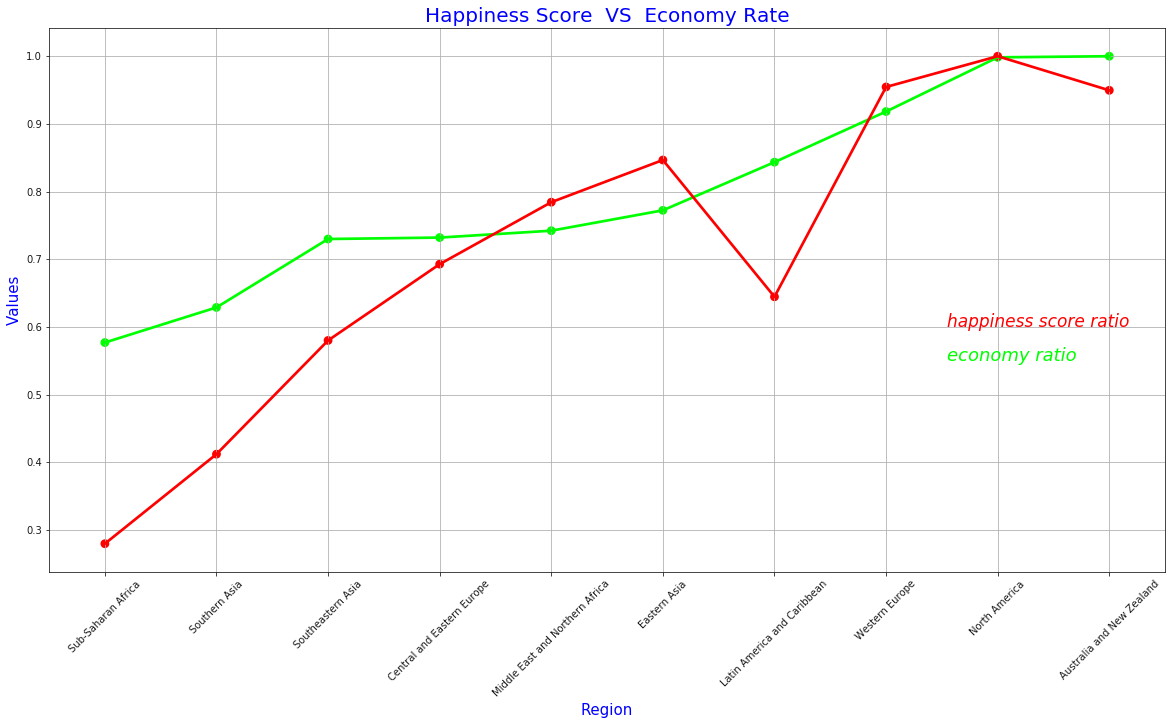

In [40]:
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)

#Visualization
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style = 'italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Happiness Score  VS  Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()

<a id=4></a>
**<h1>Joint Plot</h1>**
* Visualization of the percentage of happiness according to regions and the rate of family affecting it.
* With the joint plot we can see the correlation between the two features.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


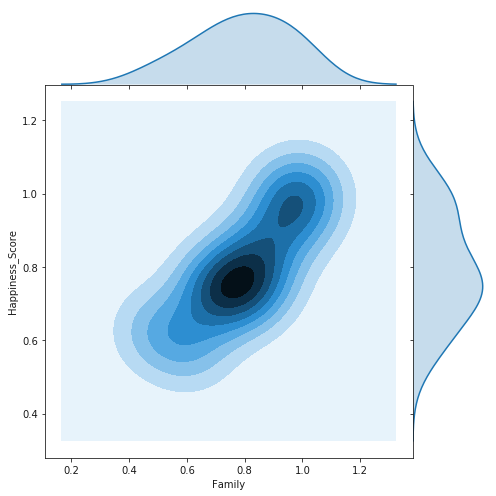

In [41]:
dataframe=pd.pivot_table(data_2015, index = 'Region', values=["Happiness_Score","Family"])
#to normalize
dataframe["Happiness_Score"]=dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"]=dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family,dataframe.Happiness_Score,kind="kde",height=7,space=0)
plt.savefig('graph.png')
plt.show()

* We find that there is a positive correlation between family and happiness score.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


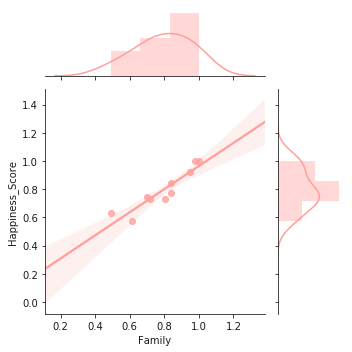

In [42]:
#Linear regression with marginal distributions
g = sns.jointplot("Family", "Happiness_Score", data=dataframe,height=5,kind="reg",ratio=3, color="r")

<a id=5></a>
**<h1>Pie Chart</h1>**
* According to the year we can visually see the percentage of happiness score.

In [43]:
#broadcasting
data_2015['Year']=2015
data_2016['Year']=2016
data_2017['Year']=2017
#concating
data_concat=pd.concat([data_2015,data_2016,data_2017],axis=0,sort = False)

df=pd.pivot_table(data_concat, index = 'Year', values="Happiness_Score")
df

,Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


* The values displayed in the Happiness Score column are the annual average for all countries.

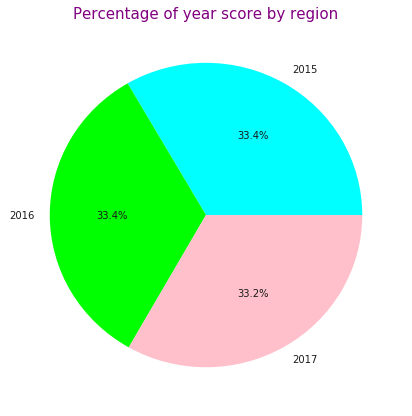

In [44]:
#pie chart
df.dropna(inplace = True)
labels =df.index
colors = ['cyan','lime','pink']
explode = [0,0,0]
sizes = df.values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of year score by region',color = 'purple',fontsize = 15)
plt.show()

<a id=6></a>
**<h1>Lm Plot</h1>**
* We used Lm Plot to see the results of a linear regression in data set.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


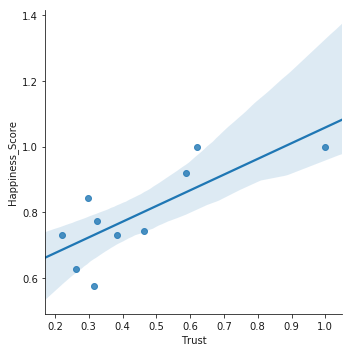

In [45]:
dataframe2=pd.pivot_table(data_2015, index = 'Region', values=["Happiness_Score","Trust"])
#to normalize
dataframe2["Happiness_Score"]=dataframe2["Happiness_Score"]/max(dataframe2["Happiness_Score"])
dataframe2["Trust"]=dataframe2["Trust"]/max(dataframe2["Trust"])
sns.lmplot("Trust","Happiness_Score",data=dataframe2)
plt.show()

* As the perception of corruption decreases, we can say that happiness score also increases.

<a id=7></a>
**<h1>Kde Plot</h1>**
* visualization with the score of happiness according to years and the value of freedom affecting it.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


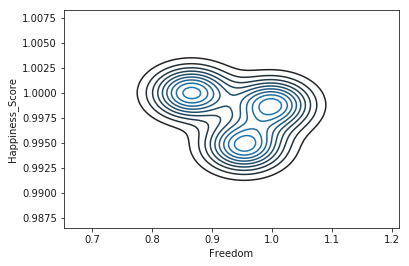

In [46]:
dataframe3=pd.pivot_table(data_concat, index = 'Year', values=["Happiness_Score","Freedom"])
#to normalize
dataframe3["Happiness_Score"]=dataframe3["Happiness_Score"]/max(dataframe3["Happiness_Score"])
dataframe3["Freedom"]=dataframe3["Freedom"]/max(dataframe3["Freedom"])
sns.kdeplot(dataframe3.Freedom,dataframe3.Happiness_Score,shade=False,cut=5)
plt.show()

<a id=8></a>
**<h1>Violin Plot</h1>**
* The violin plot does not look at the correlation between the two features. It looks at the distribution of the values within the features.

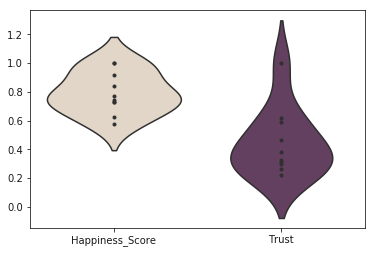

In [47]:
pal=sns.cubehelix_palette(2,rot=.5,dark=.3)
sns.violinplot(data=dataframe2, palette=pal, inner="points")
plt.show()

<a id=9></a>
**<h1>Heatmap</h1>**
* We can visualize the correlation between HeatMap and the features in our dataset.

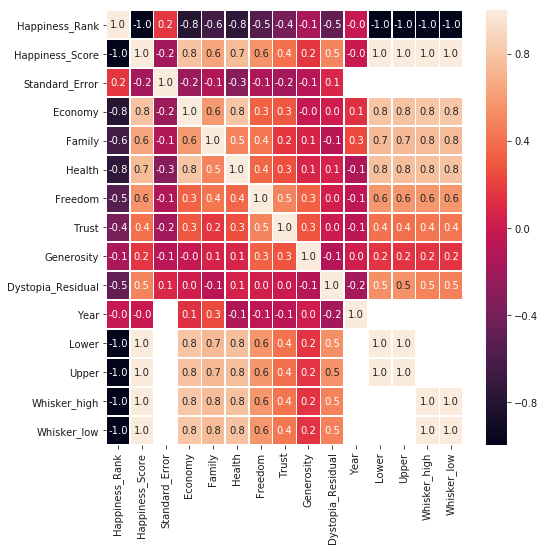

In [48]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data_concat.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

<a id=10></a>
**<h1>Box Plot</h1>**
* We can see the percentage of happiness score according to years by box plot.

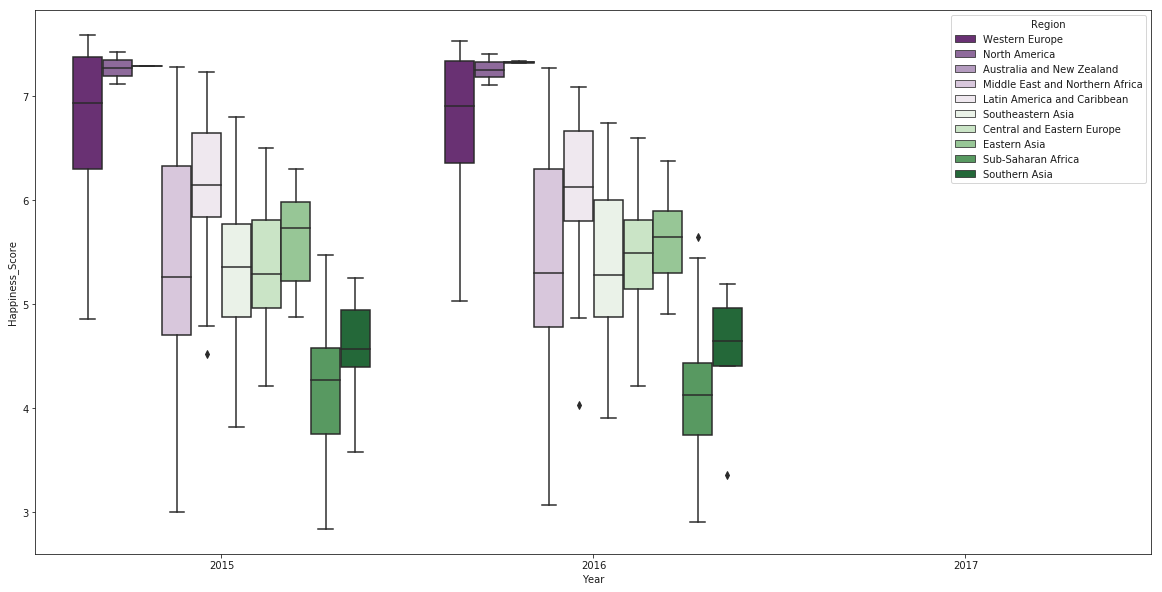

In [49]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="Year" , y="Happiness_Score", hue="Region",data=data_concat,palette="PRGn",ax=ax)
plt.show()

* The year 2017 seems to be empty because in our 2017 year, the regions are numbered instead of region names.

<a id=11></a>
**<h1>Swarm Plot</h1>**
* We can see the rate of happiness according to years by swarm plot.

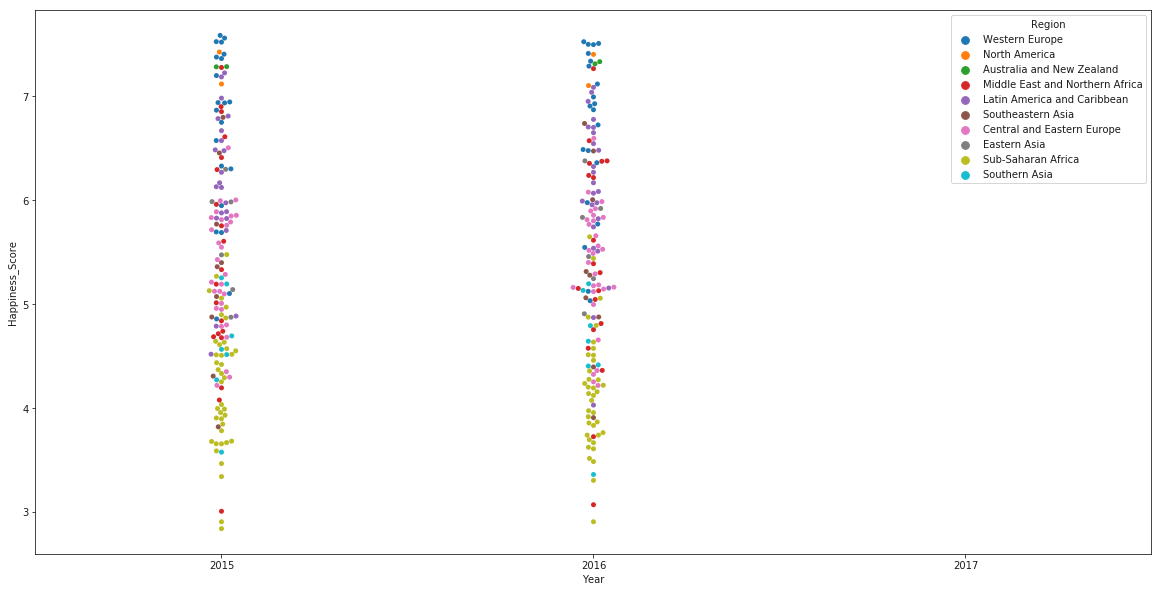

In [50]:
f,ax = plt.subplots(figsize =(20,10))
sns.swarmplot(x="Year" , y="Happiness_Score", hue="Region",data=data_concat,ax=ax)
plt.show()

<a id=12></a>
**<h1>Pair Plot</h1>**
* We can interpret the relationship between the happiness score rate and the economy visually with the pair plot.
      As the happiness score increases, we can say that the economy is increasing or it is also possible to say the opposite.

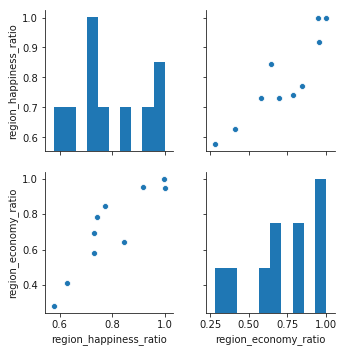

In [51]:
#Pair Plot
sns.pairplot(data)
plt.show()

<a id=13></a>
**<h1>Count Plot</h1>**
* We found the country numbers that the regions contain.

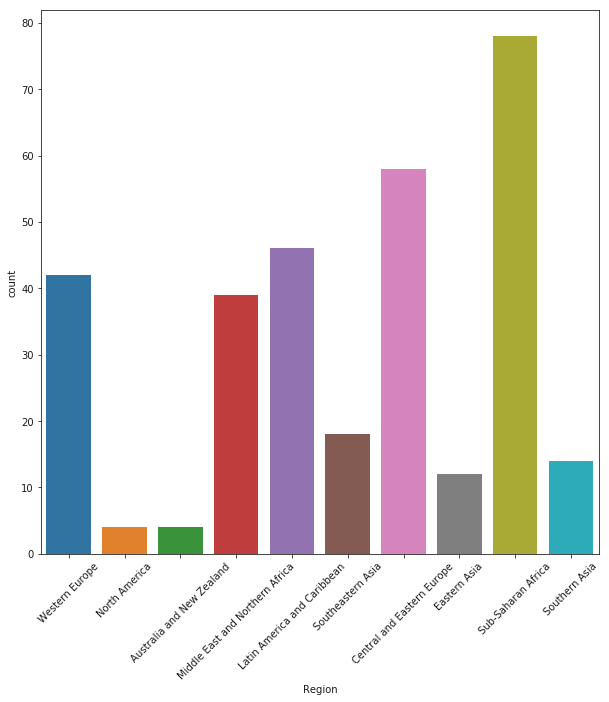

In [52]:
f,ax = plt.subplots(figsize =(10,10))
sns.countplot(data_concat.Region,ax=ax)
plt.xticks(rotation= 45)
plt.show()

* Parallel plots tell us that it is not logical to use these properties for classification.